<a href="https://colab.research.google.com/github/taylynne/code_you/blob/master/animal_intake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving sac_2yr_aggregate_24_23.xlsx to sac_2yr_aggregate_24_23.xlsx


In [3]:
import os
print(os.listdir())

['.config', 'sac_2yr_aggregate_24_23.xlsx', 'sample_data']


In [4]:
df = pd.read_excel('sac_2yr_aggregate_24_23.xlsx', header=None)

pd.set_option('display.max_columns', None)

df.head(8)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,NaN,NaN,Dogs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,State,Year,Org Count,Total Intakes,Community Intakes,Total Outcomes,Stray At Large Total,Relinquished By Owner Total,Seized Total,Other Intakes Total,Transferred In Total,Adoption Total,Returned To Field Total,Returned To Owner Total,Other Live Outcome Total,Transferred Out Total,Died In Care Total,Lost In Care Total,Shelter Euthanasia Total,Total Intakes,Community Intakes,Total Outcomes,Stray At Large Total,Relinquished By Owner Total,Seized Total,Other Intakes Total,Transferred In Total,Adoption Total,Returned To Field Total,Returned To Owner Total,Other Live Outcome Total,Transferred Out Total,Died In Care Total,Lost In Care Total,Shelter Euthanasia Total
2,AK,2023,40,10295,9278,10078,5084,3267,431,496,1017,4793,8,2641,68,1228,55,8,1278,8542,8086,8404,5146,2486,103,351,456,5203,342,509,83,1024,164,10,1069
3,AK,2024,40,9669,8823,9500,5208,2689,408,518,845,4348,14,2406,96,1327,52,11,1246,9021,8516,8669,5511,2319,137,548,505,5286,518,480,111,905,200,23,1147
4,AL,2023,200,90847,77306,86885,46896,21374,2894,6142,13542,43434,113,12412,2506,15946,969,141,11365,51277,46448,49146,29117,12164,797,4370,4829,28749,4386,1124,1915,5536,1424,134,5877
5,AL,2024,200,84922,72057,83446,41508,20487,3173,6889,12864,42037,93,11790,1580,15274,968,170,11534,49804,45340,48570,28218,12077,803,4243,4464,28530,4294,1232,1195,5553,1484,153,6131
6,AR,2023,193,63663,52190,61082,31613,15204,1838,3535,11472,32374,78,9485,655,12410,663,84,5333,37631,31732,36341,20098,8657,507,2470,5900,21262,3147,989,665,5948,1007,83,3240
7,AR,2024,193,61438,49080,60096,28964,14379,2132,3605,12357,33895,81,8809,581,10946,631,99,5054,38550,31605,37754,20042,8370,568,2625,6945,22749,3012,992,577,6408,1032,99,2885


Before working on splitting the dataframe into two, I am filling in the first row with the data classification (info, dogs, or cats)

In [5]:
categories = df.iloc[0].copy()
categories.iloc[:3] = "Info"
categories.iloc[3] = "Dogs"
categories = categories.fillna(method="ffill")

print(categories)

subheaders= df.iloc[1]
print(subheaders)

0     Info
1     Info
2     Info
3     Dogs
4     Dogs
5     Dogs
6     Dogs
7     Dogs
8     Dogs
9     Dogs
10    Dogs
11    Dogs
12    Dogs
13    Dogs
14    Dogs
15    Dogs
16    Dogs
17    Dogs
18    Dogs
19    Cats
20    Cats
21    Cats
22    Cats
23    Cats
24    Cats
25    Cats
26    Cats
27    Cats
28    Cats
29    Cats
30    Cats
31    Cats
32    Cats
33    Cats
34    Cats
Name: 0, dtype: object
0                           State
1                            Year
2                       Org Count
3                   Total Intakes
4               Community Intakes
5                  Total Outcomes
6            Stray At Large Total
7     Relinquished By Owner Total
8                    Seized Total
9             Other Intakes Total
10           Transferred In Total
11                 Adoption Total
12        Returned To Field Total
13        Returned To Owner Total
14       Other Live Outcome Total
15          Transferred Out Total
16             Died In Care Total
17            

<ipython-input-5-bc75d786d1e4>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  categories = categories.fillna(method="ffill")


I need to combine the categories (info, dog, cat) with the main titles (State, year, intake, etc) for each column.

In [6]:
combined_headers = []
for cat, sub_cat in zip(categories, subheaders):
  if pd.isna(sub_cat):
    combined_headers.append(cat)
  else:
    combined_headers.append(f"{cat}_{sub_cat}".strip('_'))

print(combined_headers)

['Info_State', 'Info_Year', 'Info_Org Count', 'Dogs_Total Intakes', 'Dogs_Community Intakes', 'Dogs_Total Outcomes', 'Dogs_Stray At Large Total', 'Dogs_Relinquished By Owner Total', 'Dogs_Seized Total', 'Dogs_Other Intakes Total', 'Dogs_Transferred In Total', 'Dogs_Adoption Total', 'Dogs_Returned To Field Total', 'Dogs_Returned To Owner Total', 'Dogs_Other Live Outcome Total', 'Dogs_Transferred Out Total', 'Dogs_Died In Care Total', 'Dogs_Lost In Care Total', 'Dogs_Shelter Euthanasia Total', 'Cats_Total Intakes', 'Cats_Community Intakes', 'Cats_Total Outcomes', 'Cats_Stray At Large Total', 'Cats_Relinquished By Owner Total', 'Cats_Seized Total', 'Cats_Other Intakes Total', 'Cats_Transferred In Total', 'Cats_Adoption Total', 'Cats_Returned To Field Total', 'Cats_Returned To Owner Total', 'Cats_Other Live Outcome Total', 'Cats_Transferred Out Total', 'Cats_Died In Care Total', 'Cats_Lost In Care Total', 'Cats_Shelter Euthanasia Total']


Now that I have the new headers I need to remove the first two rows, and then I will apply the combined headers to the df as the columns.

In [7]:
df_updated = df.iloc[2:].copy()

df_updated.columns = combined_headers

df_updated.head(5)

,Info_State,Info_Year,Info_Org Count,Dogs_Total Intakes,Dogs_Community Intakes,Dogs_Total Outcomes,Dogs_Stray At Large Total,Dogs_Relinquished By Owner Total,Dogs_Seized Total,Dogs_Other Intakes Total,Dogs_Transferred In Total,Dogs_Adoption Total,Dogs_Returned To Field Total,Dogs_Returned To Owner Total,Dogs_Other Live Outcome Total,Dogs_Transferred Out Total,Dogs_Died In Care Total,Dogs_Lost In Care Total,Dogs_Shelter Euthanasia Total,Cats_Total Intakes,Cats_Community Intakes,Cats_Total Outcomes,Cats_Stray At Large Total,Cats_Relinquished By Owner Total,Cats_Seized Total,Cats_Other Intakes Total,Cats_Transferred In Total,Cats_Adoption Total,Cats_Returned To Field Total,Cats_Returned To Owner Total,Cats_Other Live Outcome Total,Cats_Transferred Out Total,Cats_Died In Care Total,Cats_Lost In Care Total,Cats_Shelter Euthanasia Total
2,AK,2023,40,10295,9278,10078,5084,3267,431,496,1017,4793,8,2641,68,1228,55,8,1278,8542,8086,8404,5146,2486,103,351,456,5203,342,509,83,1024,164,10,1069
3,AK,2024,40,9669,8823,9500,5208,2689,408,518,845,4348,14,2406,96,1327,52,11,1246,9021,8516,8669,5511,2319,137,548,505,5286,518,480,111,905,200,23,1147
4,AL,2023,200,90847,77306,86885,46896,21374,2894,6142,13542,43434,113,12412,2506,15946,969,141,11365,51277,46448,49146,29117,12164,797,4370,4829,28749,4386,1124,1915,5536,1424,134,5877
5,AL,2024,200,84922,72057,83446,41508,20487,3173,6889,12864,42037,93,11790,1580,15274,968,170,11534,49804,45340,48570,28218,12077,803,4243,4464,28530,4294,1232,1195,5553,1484,153,6131
6,AR,2023,193,63663,52190,61082,31613,15204,1838,3535,11472,32374,78,9485,655,12410,663,84,5333,37631,31732,36341,20098,8657,507,2470,5900,21262,3147,989,665,5948,1007,83,3240


Now that I have this, I would prefer to separate this dataframe into two different sets so I can easily work with just the dogs or just the cats.

In [8]:
info_cols = [col for col in df_updated.columns if col.startswith('Info_')]
dog_cols = [col for col in df_updated.columns if col.startswith('Dogs_')]
cat_cols = [col for col in df_updated.columns if col.startswith("Cats_")]

dogs_df = df_updated[info_cols + dog_cols]
cats_df = df_updated[info_cols + cat_cols]

dogs_df.head(5)

,Info_State,Info_Year,Info_Org Count,Dogs_Total Intakes,Dogs_Community Intakes,Dogs_Total Outcomes,Dogs_Stray At Large Total,Dogs_Relinquished By Owner Total,Dogs_Seized Total,Dogs_Other Intakes Total,Dogs_Transferred In Total,Dogs_Adoption Total,Dogs_Returned To Field Total,Dogs_Returned To Owner Total,Dogs_Other Live Outcome Total,Dogs_Transferred Out Total,Dogs_Died In Care Total,Dogs_Lost In Care Total,Dogs_Shelter Euthanasia Total
2,AK,2023,40,10295,9278,10078,5084,3267,431,496,1017,4793,8,2641,68,1228,55,8,1278
3,AK,2024,40,9669,8823,9500,5208,2689,408,518,845,4348,14,2406,96,1327,52,11,1246
4,AL,2023,200,90847,77306,86885,46896,21374,2894,6142,13542,43434,113,12412,2506,15946,969,141,11365
5,AL,2024,200,84922,72057,83446,41508,20487,3173,6889,12864,42037,93,11790,1580,15274,968,170,11534
6,AR,2023,193,63663,52190,61082,31613,15204,1838,3535,11472,32374,78,9485,655,12410,663,84,5333


In [9]:
cats_df.head(5)

,Info_State,Info_Year,Info_Org Count,Cats_Total Intakes,Cats_Community Intakes,Cats_Total Outcomes,Cats_Stray At Large Total,Cats_Relinquished By Owner Total,Cats_Seized Total,Cats_Other Intakes Total,Cats_Transferred In Total,Cats_Adoption Total,Cats_Returned To Field Total,Cats_Returned To Owner Total,Cats_Other Live Outcome Total,Cats_Transferred Out Total,Cats_Died In Care Total,Cats_Lost In Care Total,Cats_Shelter Euthanasia Total
2,AK,2023,40,8542,8086,8404,5146,2486,103,351,456,5203,342,509,83,1024,164,10,1069
3,AK,2024,40,9021,8516,8669,5511,2319,137,548,505,5286,518,480,111,905,200,23,1147
4,AL,2023,200,51277,46448,49146,29117,12164,797,4370,4829,28749,4386,1124,1915,5536,1424,134,5877
5,AL,2024,200,49804,45340,48570,28218,12077,803,4243,4464,28530,4294,1232,1195,5553,1484,153,6131
6,AR,2023,193,37631,31732,36341,20098,8657,507,2470,5900,21262,3147,989,665,5948,1007,83,3240


In [10]:
dogs_df.sort_values(by='Dogs_Total Intakes', ascending=False)

,Info_State,Info_Year,Info_Org Count,Dogs_Total Intakes,Dogs_Community Intakes,Dogs_Total Outcomes,Dogs_Stray At Large Total,Dogs_Relinquished By Owner Total,Dogs_Seized Total,Dogs_Other Intakes Total,Dogs_Transferred In Total,Dogs_Adoption Total,Dogs_Returned To Field Total,Dogs_Returned To Owner Total,Dogs_Other Live Outcome Total,Dogs_Transferred Out Total,Dogs_Died In Care Total,Dogs_Lost In Care Total,Dogs_Shelter Euthanasia Total
89,TX,2024,1001,457440,381963,450244,246096,92015,17837,26016,75476,237297,1768,65506,4414,85901,5428,1686,48245
88,TX,2023,1001,457092,382387,451946,241881,95436,15260,29810,74705,237904,1629,67128,5103,85583,5485,977,48137
10,CA,2023,1387,444782,367074,437320,243418,88855,11919,22881,77708,243013,615,68779,5750,70312,4165,630,44056
11,CA,2024,1387,437334,364753,434428,238514,86396,14683,25161,72580,243829,580,68230,7345,64407,4072,784,45181
20,FL,2023,679,187125,143029,186848,75739,48913,6666,11711,44095,119579,78,22486,4326,25596,1702,161,12921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,NH,2023,50,7693,4559,7597,1527,2180,338,515,3133,5534,1,1097,37,611,64,2,251
19,DE,2024,30,7572,5016,7954,2366,2049,213,388,2556,5653,2,928,67,711,68,7,517
63,NH,2024,50,7310,4285,7267,1480,2011,230,564,3025,5349,1,1029,22,565,64,2,235
94,VT,2023,45,5316,3159,5428,956,1793,30,379,2157,4185,1,306,57,573,55,3,247


I am going to work with the dog data first.  Looking at the data, we can see that there is only two years included.  So I want to split the data by the years so I might be able to compare the two.

In [11]:
dogs_df_2024 = dogs_df[dogs_df['Info_Year'] == 2024]
dogs_df_2023 = dogs_df[dogs_df['Info_Year'] == 2023]

dogs_df_2023.sort_values(by='Dogs_Total Intakes', ascending=False)

,Info_State,Info_Year,Info_Org Count,Dogs_Total Intakes,Dogs_Community Intakes,Dogs_Total Outcomes,Dogs_Stray At Large Total,Dogs_Relinquished By Owner Total,Dogs_Seized Total,Dogs_Other Intakes Total,Dogs_Transferred In Total,Dogs_Adoption Total,Dogs_Returned To Field Total,Dogs_Returned To Owner Total,Dogs_Other Live Outcome Total,Dogs_Transferred Out Total,Dogs_Died In Care Total,Dogs_Lost In Care Total,Dogs_Shelter Euthanasia Total
88,TX,2023,1001,457092,382387,451946,241881,95436,15260,29810,74705,237904,1629,67128,5103,85583,5485,977,48137
10,CA,2023,1387,444782,367074,437320,243418,88855,11919,22881,77708,243013,615,68779,5750,70312,4165,630,44056
20,FL,2023,679,187125,143029,186848,75739,48913,6666,11711,44095,119579,78,22486,4326,25596,1702,161,12921
22,GA,2023,344,124260,99392,121278,56048,29757,5165,8421,24869,65738,325,16504,1491,24710,1411,191,10908
86,TN,2023,328,123025,95540,113150,52976,30176,3112,9276,27485,64009,93,15270,1946,20024,1251,135,10422
50,MO,2023,318,116756,102611,113068,59885,27144,8579,7002,14145,60590,262,21711,1449,15925,1089,162,11879
56,NC,2023,391,114798,89236,113529,49559,28124,3832,7721,25562,67850,103,15840,853,16658,1108,333,10786
8,AZ,2023,348,104579,87421,101020,51050,24284,4724,7364,17158,65347,38,13931,1285,11687,1137,125,7469
12,CO,2023,270,100163,78133,96707,41651,26779,2912,6790,22030,55579,48,21859,877,9387,707,75,8174
72,OH,2023,363,93930,70324,91133,38488,21507,3132,7197,23607,60606,60,12577,1353,8996,917,128,6495


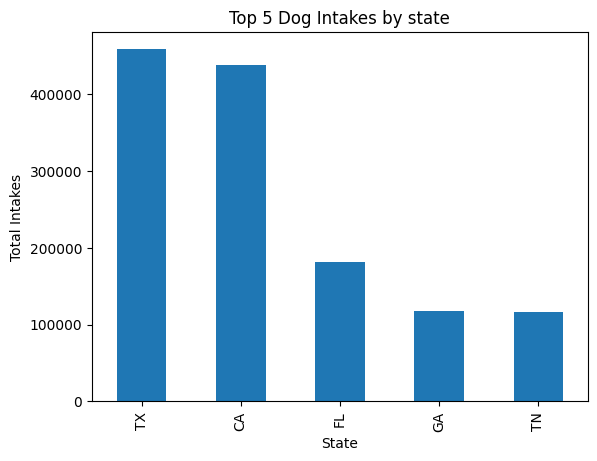

In [23]:
top_dogs = (
    dogs_df_2024.groupby('Info_State')['Dogs_Total Intakes']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_dogs.plot(kind='bar')
plt.title('Top 5 Dog Intakes by State 2024')
plt.xlabel("State")
plt.ylabel("Total Intakes")
plt.show()

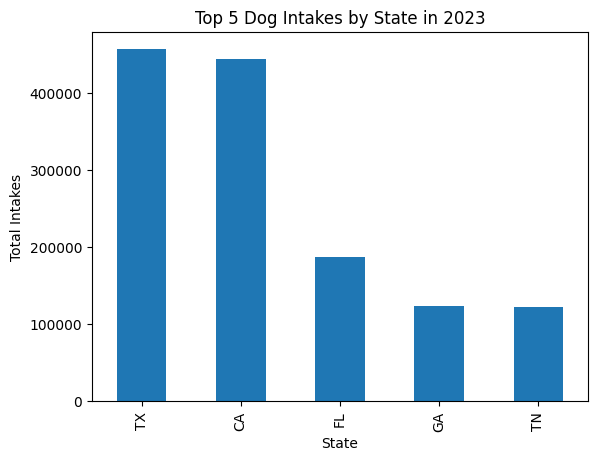

In [27]:
top_dogs_23 = (
    dogs_df_2023.groupby("Info_State")['Dogs_Total Intakes']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

top_dogs_23.plot(kind='bar')
plt.title('Top 5 Dog Intakes by State in 2023')
plt.xlabel("State")
plt.ylabel("Total Intakes")
plt.show()

I wanted to compare intake to adoptions.

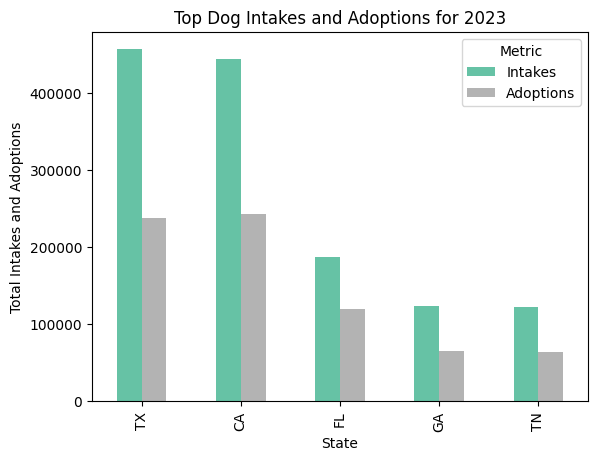

In [38]:
top_dogs_23 = (
    dogs_df_2023.set_index("Info_State")[["Dogs_Total Intakes", "Dogs_Adoption Total"]]
    .sort_values(by="Dogs_Total Intakes", ascending=False)
    .head(5)
)

top_dogs_23.plot(kind="bar", colormap="Set2")
plt.title("Top Dog Intakes and Adoptions for 2023")
plt.xlabel("State")
plt.ylabel('Total Intakes and Adoptions')
plt.legend(['Intakes', "Adoptions"], title="Metric")
plt.show()

There's a huge difference between the number of dog intakes compared to adoptions.  However, as someone who has worked as Animal Control, I recognize there are a lot of other options that should be considered such as return to owner and transferring out.  We worked with rescues who would pull animals from us in areas where there are more demand for dogs, with less dogs availble at local shelters.

<ipython-input-43-78e323eb3ba9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df_2023['Dogs_Live_Outcomes_Total'] = (


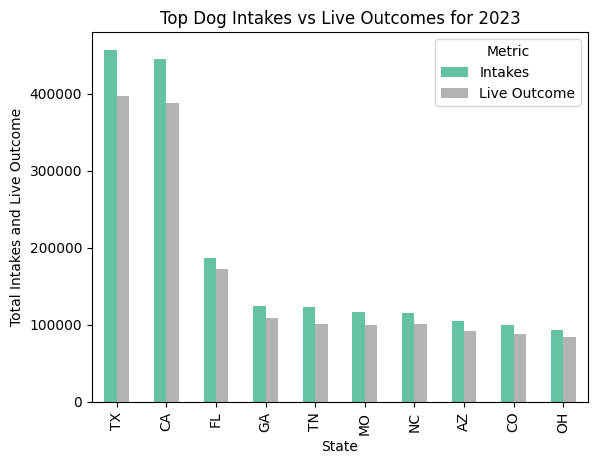

In [43]:
dogs_df_2023['Dogs_Live_Outcomes_Total'] = (
    dogs_df_2023['Dogs_Other Live Outcome Total'] +
    dogs_df_2023['Dogs_Adoption Total'] +
    dogs_df_2023['Dogs_Returned To Field Total'] +
    dogs_df_2023['Dogs_Returned To Owner Total'] +
    dogs_df_2023['Dogs_Transferred Out Total']
)

top_dogs_23 = (
    dogs_df_2023.set_index("Info_State")[["Dogs_Total Intakes", "Dogs_Live_Outcomes_Total"]]
    .sort_values(by="Dogs_Total Intakes", ascending=False)
    .head(10)
)

top_dogs_23.plot(kind="bar", colormap="Set2")
plt.title("Top Dog Intakes vs Live Outcomes for 2023")
plt.xlabel("State")
plt.ylabel('Total Intakes and Live Outcome')
plt.legend(['Intakes', "Live Outcome"], title="Metric")
plt.show()

I think it would be nice to see the percentages.

<ipython-input-58-cdb082720e6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dogs_df_2023['Dogs_Live_Outcome_Rate_%'] = (


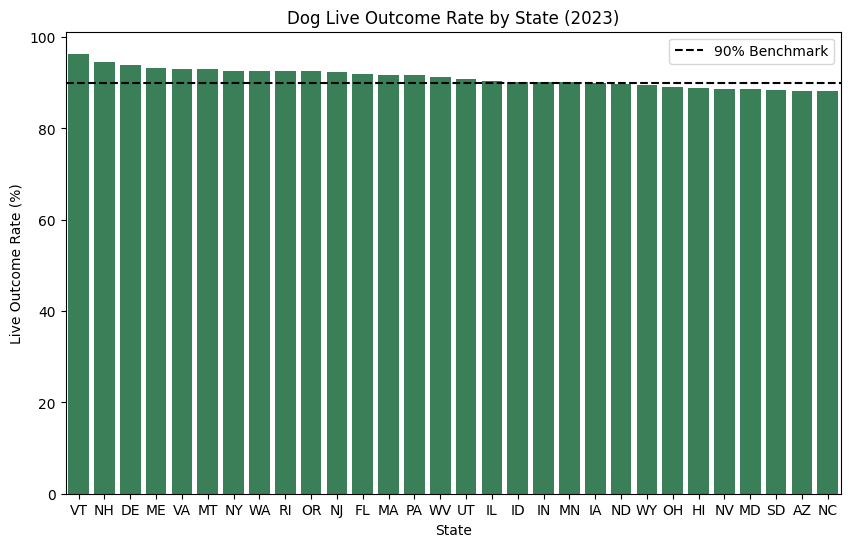

In [58]:
dogs_df_2023['Dogs_Live_Outcome_Rate_%'] = (
    dogs_df_2023['Dogs_Live_Outcomes_Total'] /
    dogs_df_2023['Dogs_Total Intakes'] * 100
)

df_rate = dogs_df_2023[['Info_State', 'Dogs_Live_Outcome_Rate_%']].sort_values('Dogs_Live_Outcome_Rate_%', ascending=False).head(30)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_rate,
    x="Info_State",
    y="Dogs_Live_Outcome_Rate_%",
    color="seagreen"
)

plt.title("Dog Live Outcome Rate by State (2023)")
plt.xlabel("State")
plt.ylabel("Live Outcome Rate (%)")

plt.axhline(90, color="black", linestyle="--", label="90% Benchmark")
plt.legend()

plt.show()

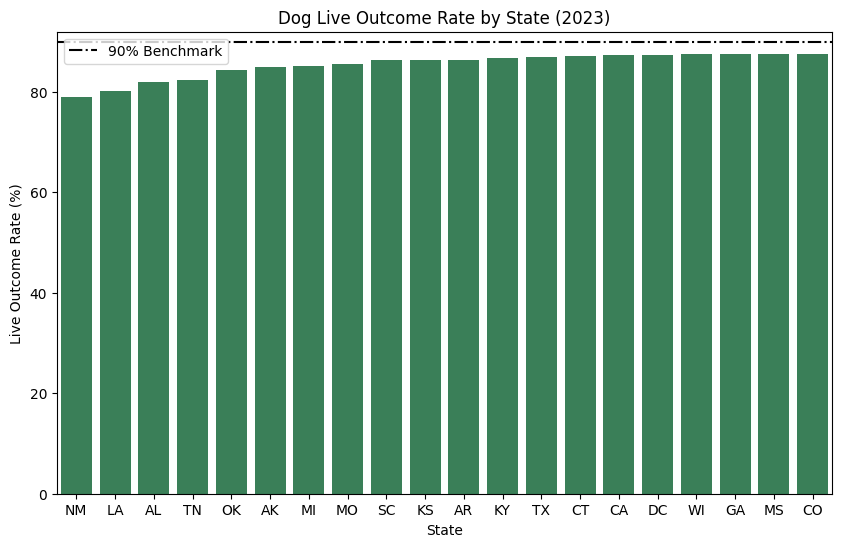

In [60]:
df_rate = dogs_df_2023[['Info_State', 'Dogs_Live_Outcome_Rate_%']].sort_values('Dogs_Live_Outcome_Rate_%').head(20)

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_rate,
    x="Info_State",
    y="Dogs_Live_Outcome_Rate_%",
    color="seagreen"
)

plt.title("Dog Live Outcome Rate by State (2023)")
plt.xlabel("State")
plt.ylabel("Live Outcome Rate (%)")

plt.axhline(90, color="black", linestyle="-.", label="90% Benchmark")
plt.legend()

plt.show()